<a href="https://colab.research.google.com/github/ihabChaker/-/blob/master/CLSTM/CLSTM__filters32__kernel5__lstm128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io
import tensorflow as tf
import numpy as np
from tensorflow import  keras
from sklearn.preprocessing import MinMaxScaler,StandardScaler,scale
from skimage.measure import block_reduce
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from datetime import datetime
import pandas as pd
import time
from sklearn.metrics import classification_report

In [3]:
with open('/content/drive/MyDrive/SAVED_DATA/random_data_per_sample/augmentation4/x_test.npy', 'rb') as f:
    x_test=np.load(f,allow_pickle=True)
with open('/content/drive/MyDrive/SAVED_DATA/random_data_per_sample/augmentation4/y_test.npy', 'rb') as f:
    y_test=np.load(f,allow_pickle=True)
with open('/content/drive/MyDrive/SAVED_DATA/random_data_per_sample/augmentation4/x_train.npy', 'rb') as f:
    x_train=np.load(f,allow_pickle=True)
with open('/content/drive/MyDrive/SAVED_DATA/random_data_per_sample/augmentation4/y_train.npy', 'rb') as f:
    y_train=np.load(f,allow_pickle=True)

In [4]:
num_classes = 3
def make_cnn_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D (filters=32, kernel_size=5, padding="same", data_format="channels_first",)(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.AveragePooling1D(pool_size=3,  data_format="channels_first") (conv1) 


    lstm = keras.layers.LSTM(128)(conv1)



    # gap = keras.layers.GlobalAveragePooling1D()(lstm)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(lstm)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)




In [5]:
input_shape = x_train[0].shape 
model = make_cnn_model(input_shape)

In [6]:

logdir = "drive/MyDrive/PFE_TENSORBOARD_DATA/epoches200/augmentation4/LSTM/logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = [ 
            #  tf.keras.callbacks.TensorBoard(log_dir=logdir),
            #  tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',patience =60 ,min_delta=1e-3)
             ]

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
start_time= time.time()
history = model.fit(
    
    x = x_train  ,
    y= y_train ,
    validation_split=0.2,
    epochs=200,
    batch_size=20,
    callbacks=callbacks

    )
end_time=time.time()
train_time=end_time-start_time

Epoch 1/200
1269/1269 [==============================] - 31s 14ms/step - loss: 0.6182 - sparse_categorical_accuracy: 0.7362 - val_loss: 0.4023 - val_sparse_categorical_accuracy: 0.8466
Epoch 2/200
1269/1269 [==============================] - 16s 13ms/step - loss: 0.2415 - sparse_categorical_accuracy: 0.9166 - val_loss: 0.1888 - val_sparse_categorical_accuracy: 0.9374
Epoch 3/200
1269/1269 [==============================] - 18s 14ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9709 - val_loss: 0.1257 - val_sparse_categorical_accuracy: 0.9615
Epoch 4/200
1269/1269 [==============================] - 18s 14ms/step - loss: 0.0483 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.1116 - val_sparse_categorical_accuracy: 0.9661
Epoch 5/200
1269/1269 [==============================] - 18s 14ms/step - loss: 0.0310 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.1174 - val_sparse_categorical_accuracy: 0.9601
Epoch 6/200
1269/1269 [==============================] - 17s 13ms/step - lo

In [7]:
score = model.evaluate(x_test, y_test ) 

248/248 [==============================] - 2s 7ms/step - loss: 0.0877 - sparse_categorical_accuracy: 0.9943


In [8]:
score

[0.08773148059844971, 0.9943253397941589]

In [9]:
train_time

3505.7176942825317

In [10]:
# model.save("/content/drive/MyDrive/PFE_RESULTS_DATA/epoches200/random_data_per_sample/augmentation4/scaling/LSTM/LSTM.h5")

In [11]:
# %load_ext tensorboard

In [12]:
# %tensorboard --logdir drive/MyDrive/PFE_TENSORBOARD_DATA/epoches200/augmentation4/LSTM/logs/scalars/

In [13]:
# import json
# with open('/content/drive/MyDrive/PFE_RESULTS_DATA/epoches200/random_data_per_sample/augmentation4/scaling/LSTM/LSTM_score.json', 'w+') as file:

#     json.dump(score, file)

In [14]:
# with open('/content/drive/MyDrive/PFE_RESULTS_DATA/epoches200/random_data_per_sample/augmentation4/scaling/LSTM/LSTM_score.json', 'w+') as file:

#     json.dump(history.history, file)

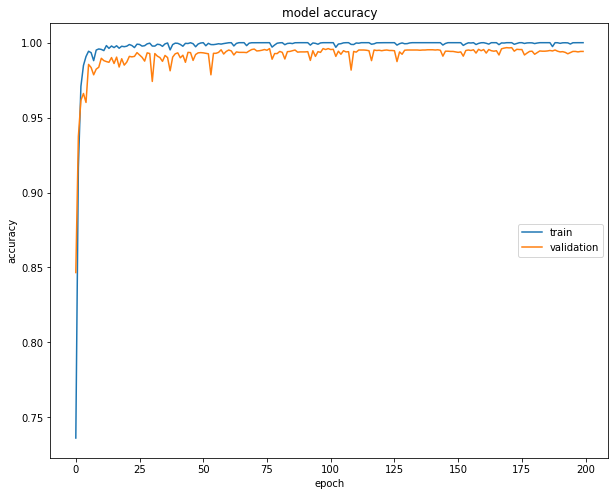

In [15]:
import matplotlib.pyplot as plt  

  
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(history.history['sparse_categorical_accuracy'])  
plt.plot(history.history['val_sparse_categorical_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='center right')  

plt.show()  

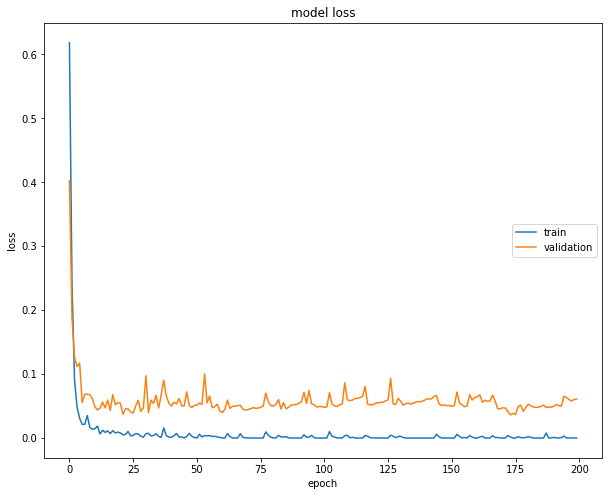

In [16]:
import matplotlib.pyplot as plt  

  
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='center right')  

plt.show()  

In [17]:
# model= tf.keras.models.load_model("/content/drive/MyDrive/PFE_RESULTS_DATA/epoches200/augmentation1/scaling/LSTM/LSTM.h5")

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 10000)]        0         
                                                                 
 conv1d (Conv1D)             (None, 32, 10000)         192       
                                                                 
 batch_normalization (BatchN  (None, 32, 10000)        40000     
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 10000)         0         
                                                                 
 average_pooling1d (AverageP  (None, 32, 3333)         0         
 ooling1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               177254

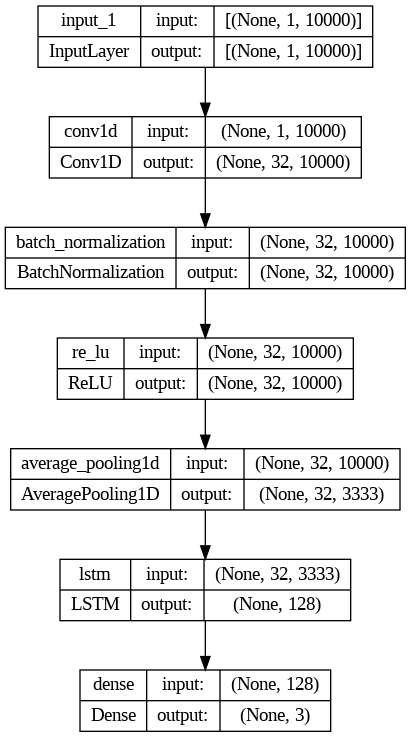

In [19]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True
    )

In [20]:
y_pred = model.predict(x_test)

248/248 [==============================] - 2s 5ms/step


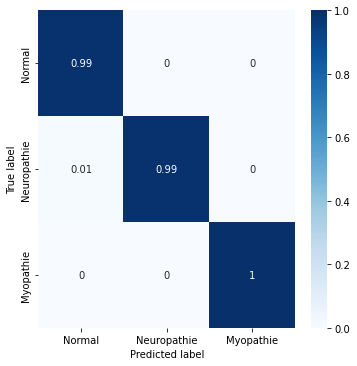

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


con_mat = tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_pred,axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = ["Normal","Neuropathie",'Myopathie'], 
                     columns = ["Normal","Neuropathie",'Myopathie'])

figure = plt.figure(figsize=(5,5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
target_names = ['Normal', 'Neuropathie', 'Myopathie']

print(classification_report(y_test,np.argmax(y_pred,axis=1), target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      2677
 Neuropathie       1.00      0.99      0.99      2564
   Myopathie       0.99      1.00      1.00      2689

    accuracy                           0.99      7930
   macro avg       0.99      0.99      0.99      7930
weighted avg       0.99      0.99      0.99      7930

